## 1 Año de secundaria

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Nota: Considerar que los datos deben tener formato UTF-8, es decir los caracteres propios del idioma español deberían ser transdormados a símbolos

Los datos se perciben del archivo denominado "data_3secundaria.csv", pandas trabaja muy bien con esos datos. Posteriormente se procede a extraer los 5 primeros datos, esto para asegurarnos que no hayan problemas de formato de letra y que pandas con la librería read_csv, correctamente importen los datos. Esto es posible con el método head(), este permitirá traer los 5 primeros registros

In [4]:
dataframe = pd.read_csv(r"data_1secundaria.csv",sep=';')
dataframe.head()

,id,seccion,edad,pf_ac1,pf_ac2,pf_ac3,pf_alg_2019,pf_alg_2020,alg_1b_2021,alg_2b_2021,...,condicion_pago,pe1,pe2,pe3,pe4,pe5,horas_asincronas,valoracion_clases,dispos_clases,calidad_internet
0,1,A,15,13,19,14,16,15,16,16,...,deuda,Facil,Ni facil ni dificil,Facil,Facil,Bueno,3 horas,Satisfecho,1,Buena
1,2,A,14,16,19,17,16,17,17,16,...,deuda,Facil,Facil,Muy facil,Facil,Excelente,De 4 horas a mas,Muy satisfecho,4,Muy buena
2,3,A,14,11,18,11,11,13,12,12,...,deuda,Ni facil ni dificil,Ni facil ni dificil,Facil,Ni facil ni dificil,Indiferente,1 hora,Indiferente,1,Media
3,4,A,14,17,17,19,18,16,16,16,...,deuda,Facil,Muy facil,Muy facil,Facil,Excelente,De 4 horas a mas,Muy satisfecho,2,Muy buena
4,5,A,15,8,9,11,11,11,12,11,...,deuda,Ni facil ni dificil,Ni facil ni dificil,Ni facil ni dificil,Ni facil ni dificil,Indiferente,1 hora,Indiferente,2,Media


Podríamos realizar la llamada a n registros con la misma función pero cambiando el parámetro

In [5]:
dataframe.head(10)

,id,seccion,edad,pf_ac1,pf_ac2,pf_ac3,pf_alg_2019,pf_alg_2020,alg_1b_2021,alg_2b_2021,...,condicion_pago,pe1,pe2,pe3,pe4,pe5,horas_asincronas,valoracion_clases,dispos_clases,calidad_internet
0,1,A,15,13,19,14,16,15,16,16,...,deuda,Facil,Ni facil ni dificil,Facil,Facil,Bueno,3 horas,Satisfecho,1,Buena
1,2,A,14,16,19,17,16,17,17,16,...,deuda,Facil,Facil,Muy facil,Facil,Excelente,De 4 horas a mas,Muy satisfecho,4,Muy buena
2,3,A,14,11,18,11,11,13,12,12,...,deuda,Ni facil ni dificil,Ni facil ni dificil,Facil,Ni facil ni dificil,Indiferente,1 hora,Indiferente,1,Media
3,4,A,14,17,17,19,18,16,16,16,...,deuda,Facil,Muy facil,Muy facil,Facil,Excelente,De 4 horas a mas,Muy satisfecho,2,Muy buena
4,5,A,15,8,9,11,11,11,12,11,...,deuda,Ni facil ni dificil,Ni facil ni dificil,Ni facil ni dificil,Ni facil ni dificil,Indiferente,1 hora,Indiferente,2,Media
5,6,A,14,17,18,18,16,17,17,18,...,deuda,Facil,Facil,Muy facil,Facil,Bueno,3 horas,Satisfecho,1,Buena
6,7,A,14,15,17,19,17,17,17,18,...,deuda,Facil,Facil,Muy facil,Facil,Bueno,3 horas,Indiferente,2,Buena
7,8,A,14,18,18,20,18,18,17,17,...,deuda,Facil,Muy facil,Muy facil,Facil,Excelente,De 4 horas a mas,Muy satisfecho,1,Muy buena
8,9,A,14,6,6,10,11,11,10,9,...,deuda,Ni facil ni dificil,Ni facil ni dificil,Ni facil ni dificil,Ni facil ni dificil,Indiferente,2 horas,Indiferente,5,Media
9,10,A,14,16,17,20,17,16,15,15,...,deuda,Facil,Facil,Muy facil,Facil,Bueno,3 horas,Satisfecho,4,Buena


Visualizamos estadísticamente a los datos con el método describe()

In [6]:
dataframe.describe()

,id,edad,pf_ac1,pf_ac2,pf_ac3,pf_alg_2019,pf_alg_2020,alg_1b_2021,alg_2b_2021,alg_3b_2021,...,pf_geo_2019,pf_geo_2020,geo_1b_2021,geo_2b_2021,geo_3b_2021,geo_4b_2021,ind_nivel_geo,grupo_mate,anios_colegio,dispos_clases
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,...,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,132.500000,14.469697,14.166667,15.731061,17.640152,15.715909,15.689394,14.962121,15.041667,16.318182,...,14.102273,14.075758,14.700758,12.844697,13.340909,14.825758,2.492424,0.094697,3.083333,2.674242
std,76.354437,0.500029,2.720620,2.794553,2.186038,2.579307,2.509700,2.666238,2.585821,2.657419,...,2.242214,2.230522,1.660729,2.745638,2.759924,3.037149,0.508427,0.293352,0.276910,1.192475
min,1.000000,14.000000,6.000000,6.000000,9.000000,11.000000,11.000000,9.000000,8.000000,5.000000,...,8.000000,9.000000,5.000000,5.000000,6.000000,5.000000,1.000000,0.000000,3.000000,1.000000
25%,66.750000,14.000000,12.000000,14.000000,16.000000,14.000000,14.000000,13.000000,14.000000,14.750000,...,12.000000,12.000000,14.000000,11.000000,12.000000,13.000000,2.000000,0.000000,3.000000,2.000000
50%,132.500000,14.000000,14.500000,16.000000,18.000000,16.000000,16.000000,15.000000,15.000000,17.000000,...,14.000000,14.000000,15.000000,13.000000,13.000000,15.000000,2.000000,0.000000,3.000000,3.000000
75%,198.250000,15.000000,16.000000,18.000000,19.000000,18.000000,17.250000,17.000000,17.000000,18.000000,...,16.000000,15.000000,16.000000,15.000000,15.000000,17.000000,3.000000,0.000000,3.000000,4.000000
max,264.000000,15.000000,19.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,19.000000,19.000000,20.000000,29.000000,3.000000,1.000000,4.000000,5.000000


Este resultado nos da muchos indicadores, entre los cuales destacan el aseguramiento de tener la cantidad correcta de cada campo del dataframe, así como los valores de media, desviación estándar y los mínimos y máximos.

Sin embargo el detalle más resaltantes es que no se han considerado todas las columnas en las que se ven letras, por tanto se necesita mapear los avlores literales a números, tal es el caso del campo: "condicion_pago". En primer lugar se hará la conversión de los datos de dicha columna y se procederá a hacer lo mismo con el resto de valores no numéricos

In [7]:
dataframe["condicion_pago"]

0      deuda
1      deuda
2      deuda
3      deuda
4      deuda
       ...  
259     beca
260     beca
261     beca
262     beca
263     beca
Name: condicion_pago, Length: 264, dtype: object

Entonces convertimos datos categóricos, ordinales  a numéricos

In [8]:
values_condicion_pago = dataframe["condicion_pago"].astype("category").cat.codes
dataframe["condicion_pago"] = values_condicion_pago

Los nuevos valores son ya numéricos

In [9]:
dataframe["condicion_pago"]

0      1
1      1
2      1
3      1
4      1
      ..
259    0
260    0
261    0
262    0
263    0
Name: condicion_pago, Length: 264, dtype: int8

In [10]:
dataframe.head(10)

,id,seccion,edad,pf_ac1,pf_ac2,pf_ac3,pf_alg_2019,pf_alg_2020,alg_1b_2021,alg_2b_2021,...,condicion_pago,pe1,pe2,pe3,pe4,pe5,horas_asincronas,valoracion_clases,dispos_clases,calidad_internet
0,1,A,15,13,19,14,16,15,16,16,...,1,Facil,Ni facil ni dificil,Facil,Facil,Bueno,3 horas,Satisfecho,1,Buena
1,2,A,14,16,19,17,16,17,17,16,...,1,Facil,Facil,Muy facil,Facil,Excelente,De 4 horas a mas,Muy satisfecho,4,Muy buena
2,3,A,14,11,18,11,11,13,12,12,...,1,Ni facil ni dificil,Ni facil ni dificil,Facil,Ni facil ni dificil,Indiferente,1 hora,Indiferente,1,Media
3,4,A,14,17,17,19,18,16,16,16,...,1,Facil,Muy facil,Muy facil,Facil,Excelente,De 4 horas a mas,Muy satisfecho,2,Muy buena
4,5,A,15,8,9,11,11,11,12,11,...,1,Ni facil ni dificil,Ni facil ni dificil,Ni facil ni dificil,Ni facil ni dificil,Indiferente,1 hora,Indiferente,2,Media
5,6,A,14,17,18,18,16,17,17,18,...,1,Facil,Facil,Muy facil,Facil,Bueno,3 horas,Satisfecho,1,Buena
6,7,A,14,15,17,19,17,17,17,18,...,1,Facil,Facil,Muy facil,Facil,Bueno,3 horas,Indiferente,2,Buena
7,8,A,14,18,18,20,18,18,17,17,...,1,Facil,Muy facil,Muy facil,Facil,Excelente,De 4 horas a mas,Muy satisfecho,1,Muy buena
8,9,A,14,6,6,10,11,11,10,9,...,1,Ni facil ni dificil,Ni facil ni dificil,Ni facil ni dificil,Ni facil ni dificil,Indiferente,2 horas,Indiferente,5,Media
9,10,A,14,16,17,20,17,16,15,15,...,1,Facil,Facil,Muy facil,Facil,Bueno,3 horas,Satisfecho,4,Buena


In [11]:
values_pe1 = dataframe["pe1"].astype("category").cat.codes
dataframe["pe1"] = values_pe1

dataframe.head(10)

,id,seccion,edad,pf_ac1,pf_ac2,pf_ac3,pf_alg_2019,pf_alg_2020,alg_1b_2021,alg_2b_2021,...,condicion_pago,pe1,pe2,pe3,pe4,pe5,horas_asincronas,valoracion_clases,dispos_clases,calidad_internet
0,1,A,15,13,19,14,16,15,16,16,...,1,0,Ni facil ni dificil,Facil,Facil,Bueno,3 horas,Satisfecho,1,Buena
1,2,A,14,16,19,17,16,17,17,16,...,1,0,Facil,Muy facil,Facil,Excelente,De 4 horas a mas,Muy satisfecho,4,Muy buena
2,3,A,14,11,18,11,11,13,12,12,...,1,2,Ni facil ni dificil,Facil,Ni facil ni dificil,Indiferente,1 hora,Indiferente,1,Media
3,4,A,14,17,17,19,18,16,16,16,...,1,0,Muy facil,Muy facil,Facil,Excelente,De 4 horas a mas,Muy satisfecho,2,Muy buena
4,5,A,15,8,9,11,11,11,12,11,...,1,2,Ni facil ni dificil,Ni facil ni dificil,Ni facil ni dificil,Indiferente,1 hora,Indiferente,2,Media
5,6,A,14,17,18,18,16,17,17,18,...,1,0,Facil,Muy facil,Facil,Bueno,3 horas,Satisfecho,1,Buena
6,7,A,14,15,17,19,17,17,17,18,...,1,0,Facil,Muy facil,Facil,Bueno,3 horas,Indiferente,2,Buena
7,8,A,14,18,18,20,18,18,17,17,...,1,0,Muy facil,Muy facil,Facil,Excelente,De 4 horas a mas,Muy satisfecho,1,Muy buena
8,9,A,14,6,6,10,11,11,10,9,...,1,2,Ni facil ni dificil,Ni facil ni dificil,Ni facil ni dificil,Indiferente,2 horas,Indiferente,5,Media
9,10,A,14,16,17,20,17,16,15,15,...,1,0,Facil,Muy facil,Facil,Bueno,3 horas,Satisfecho,4,Buena


In [12]:
values_pe2 = dataframe["pe2"].astype("category").cat.codes
dataframe["pe2"] = values_pe2

values_pe3 = dataframe["pe3"].astype("category").cat.codes
dataframe["pe3"] = values_pe3

values_pe4 = dataframe["pe4"].astype("category").cat.codes
dataframe["pe4"] = values_pe4

values_pe5 = dataframe["pe5"].astype("category").cat.codes
dataframe["pe5"] = values_pe5



dataframe.head(10)

,id,seccion,edad,pf_ac1,pf_ac2,pf_ac3,pf_alg_2019,pf_alg_2020,alg_1b_2021,alg_2b_2021,...,condicion_pago,pe1,pe2,pe3,pe4,pe5,horas_asincronas,valoracion_clases,dispos_clases,calidad_internet
0,1,A,15,13,19,14,16,15,16,16,...,1,0,2,1,0,0,3 horas,Satisfecho,1,Buena
1,2,A,14,16,19,17,16,17,17,16,...,1,0,0,2,0,1,De 4 horas a mas,Muy satisfecho,4,Muy buena
2,3,A,14,11,18,11,11,13,12,12,...,1,2,2,1,2,2,1 hora,Indiferente,1,Media
3,4,A,14,17,17,19,18,16,16,16,...,1,0,1,2,0,1,De 4 horas a mas,Muy satisfecho,2,Muy buena
4,5,A,15,8,9,11,11,11,12,11,...,1,2,2,3,2,2,1 hora,Indiferente,2,Media
5,6,A,14,17,18,18,16,17,17,18,...,1,0,0,2,0,0,3 horas,Satisfecho,1,Buena
6,7,A,14,15,17,19,17,17,17,18,...,1,0,0,2,0,0,3 horas,Indiferente,2,Buena
7,8,A,14,18,18,20,18,18,17,17,...,1,0,1,2,0,1,De 4 horas a mas,Muy satisfecho,1,Muy buena
8,9,A,14,6,6,10,11,11,10,9,...,1,2,2,3,2,2,2 horas,Indiferente,5,Media
9,10,A,14,16,17,20,17,16,15,15,...,1,0,0,2,0,0,3 horas,Satisfecho,4,Buena


In [13]:
values_seccion = dataframe["seccion"].astype("category").cat.codes
dataframe["seccion"] = values_seccion

dataframe.head(10)

,id,seccion,edad,pf_ac1,pf_ac2,pf_ac3,pf_alg_2019,pf_alg_2020,alg_1b_2021,alg_2b_2021,...,condicion_pago,pe1,pe2,pe3,pe4,pe5,horas_asincronas,valoracion_clases,dispos_clases,calidad_internet
0,1,0,15,13,19,14,16,15,16,16,...,1,0,2,1,0,0,3 horas,Satisfecho,1,Buena
1,2,0,14,16,19,17,16,17,17,16,...,1,0,0,2,0,1,De 4 horas a mas,Muy satisfecho,4,Muy buena
2,3,0,14,11,18,11,11,13,12,12,...,1,2,2,1,2,2,1 hora,Indiferente,1,Media
3,4,0,14,17,17,19,18,16,16,16,...,1,0,1,2,0,1,De 4 horas a mas,Muy satisfecho,2,Muy buena
4,5,0,15,8,9,11,11,11,12,11,...,1,2,2,3,2,2,1 hora,Indiferente,2,Media
5,6,0,14,17,18,18,16,17,17,18,...,1,0,0,2,0,0,3 horas,Satisfecho,1,Buena
6,7,0,14,15,17,19,17,17,17,18,...,1,0,0,2,0,0,3 horas,Indiferente,2,Buena
7,8,0,14,18,18,20,18,18,17,17,...,1,0,1,2,0,1,De 4 horas a mas,Muy satisfecho,1,Muy buena
8,9,0,14,6,6,10,11,11,10,9,...,1,2,2,3,2,2,2 horas,Indiferente,5,Media
9,10,0,14,16,17,20,17,16,15,15,...,1,0,0,2,0,0,3 horas,Satisfecho,4,Buena


In [14]:
values_horas_asincronas = dataframe["horas_asincronas"].astype("category").cat.codes
dataframe["horas_asincronas"] = values_horas_asincronas

values_valoracion_clases = dataframe["valoracion_clases"].astype("category").cat.codes
dataframe["valoracion_clases"] = values_valoracion_clases

values_calidad_internet = dataframe["calidad_internet"].astype("category").cat.codes
dataframe["calidad_internet"] = values_calidad_internet

dataframe.head(10)

,id,seccion,edad,pf_ac1,pf_ac2,pf_ac3,pf_alg_2019,pf_alg_2020,alg_1b_2021,alg_2b_2021,...,condicion_pago,pe1,pe2,pe3,pe4,pe5,horas_asincronas,valoracion_clases,dispos_clases,calidad_internet
0,1,0,15,13,19,14,16,15,16,16,...,1,0,2,1,0,0,2,3,1,0
1,2,0,14,16,19,17,16,17,17,16,...,1,0,0,2,0,1,3,2,4,3
2,3,0,14,11,18,11,11,13,12,12,...,1,2,2,1,2,2,0,0,1,2
3,4,0,14,17,17,19,18,16,16,16,...,1,0,1,2,0,1,3,2,2,3
4,5,0,15,8,9,11,11,11,12,11,...,1,2,2,3,2,2,0,0,2,2
5,6,0,14,17,18,18,16,17,17,18,...,1,0,0,2,0,0,2,3,1,0
6,7,0,14,15,17,19,17,17,17,18,...,1,0,0,2,0,0,2,0,2,0
7,8,0,14,18,18,20,18,18,17,17,...,1,0,1,2,0,1,3,2,1,3
8,9,0,14,6,6,10,11,11,10,9,...,1,2,2,3,2,2,1,0,5,2
9,10,0,14,16,17,20,17,16,15,15,...,1,0,0,2,0,0,2,3,4,0


In [15]:
values_genero = dataframe["genero"].astype("category").cat.codes
dataframe["genero"] = values_genero

dataframe.head(10)

,id,seccion,edad,pf_ac1,pf_ac2,pf_ac3,pf_alg_2019,pf_alg_2020,alg_1b_2021,alg_2b_2021,...,condicion_pago,pe1,pe2,pe3,pe4,pe5,horas_asincronas,valoracion_clases,dispos_clases,calidad_internet
0,1,0,15,13,19,14,16,15,16,16,...,1,0,2,1,0,0,2,3,1,0
1,2,0,14,16,19,17,16,17,17,16,...,1,0,0,2,0,1,3,2,4,3
2,3,0,14,11,18,11,11,13,12,12,...,1,2,2,1,2,2,0,0,1,2
3,4,0,14,17,17,19,18,16,16,16,...,1,0,1,2,0,1,3,2,2,3
4,5,0,15,8,9,11,11,11,12,11,...,1,2,2,3,2,2,0,0,2,2
5,6,0,14,17,18,18,16,17,17,18,...,1,0,0,2,0,0,2,3,1,0
6,7,0,14,15,17,19,17,17,17,18,...,1,0,0,2,0,0,2,0,2,0
7,8,0,14,18,18,20,18,18,17,17,...,1,0,1,2,0,1,3,2,1,3
8,9,0,14,6,6,10,11,11,10,9,...,1,2,2,3,2,2,1,0,5,2
9,10,0,14,16,17,20,17,16,15,15,...,1,0,0,2,0,0,2,3,4,0


Vamos a darle un poco de visualización

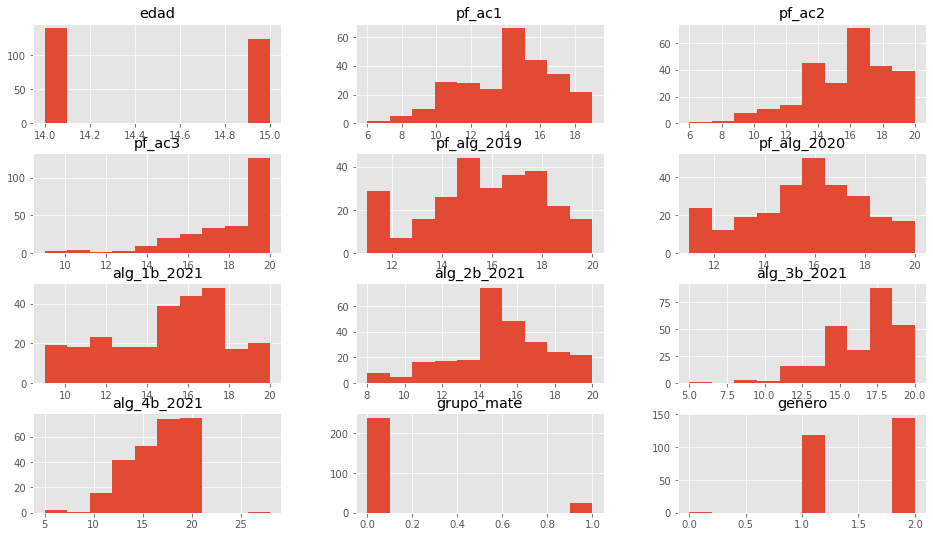

In [16]:
dataframe.hist(['edad','pf_ac1','pf_ac2','pf_ac3','pf_alg_2019','pf_alg_2020','alg_1b_2021','alg_2b_2021',
               'alg_3b_2021','alg_4b_2021','grupo_mate','genero'])
plt.show()

In [17]:
dataframe['ind_nivel_algebra']

0      3
1      3
2      3
3      3
4      2
      ..
259    3
260    3
261    3
262    3
263    3
Name: ind_nivel_algebra, Length: 264, dtype: int64

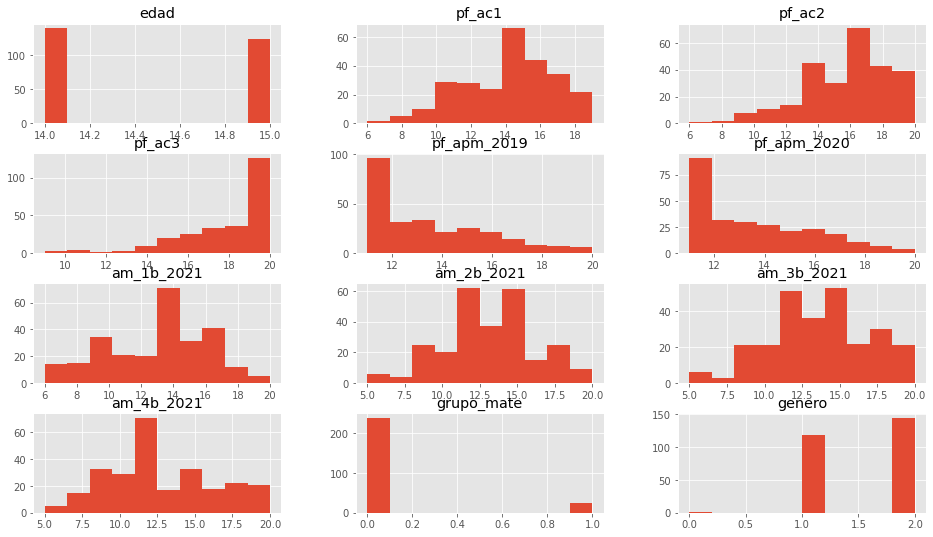

In [18]:
dataframe.hist(['edad','pf_ac1','pf_ac2','pf_ac3','pf_apm_2019','pf_apm_2020','am_1b_2021','am_2b_2021',
               'am_3b_2021','am_4b_2021','grupo_mate','genero'])

plt.show()

In [19]:
dataframe['ind_nivel_am']

0      2
1      3
2      2
3      3
4      2
      ..
259    3
260    3
261    3
262    3
263    3
Name: ind_nivel_am, Length: 264, dtype: int64

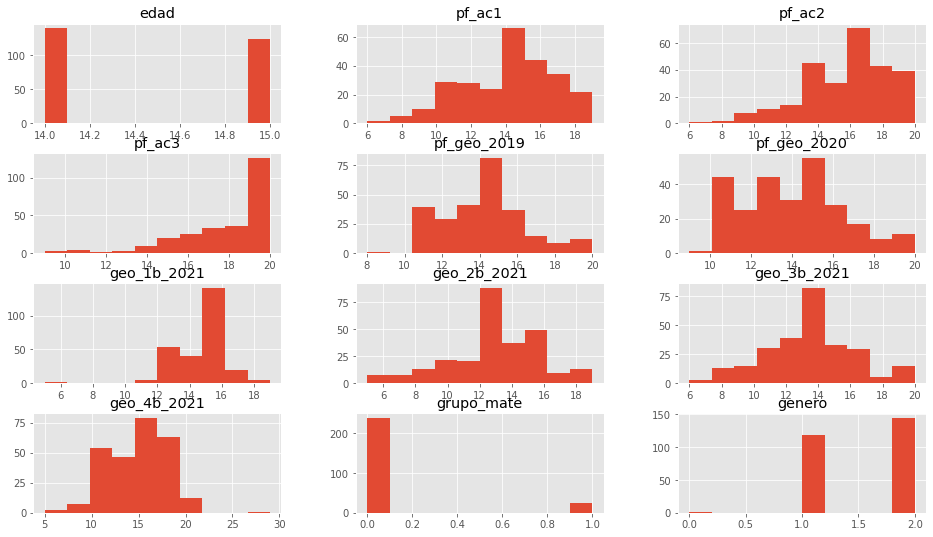

In [20]:
dataframe.hist(['edad','pf_ac1','pf_ac2','pf_ac3','pf_geo_2019','pf_geo_2020','geo_1b_2021','geo_2b_2021',
               'geo_3b_2021','geo_4b_2021','grupo_mate','genero'])
y = dataframe['ind_nivel_geo'].values
plt.show()

In [21]:
dataframe['ind_nivel_geo']

0      2
1      3
2      2
3      3
4      2
      ..
259    3
260    3
261    3
262    3
263    3
Name: ind_nivel_geo, Length: 264, dtype: int64

## Preparación de las entradas

<p style="color:red;font-size:2rem"> <b>Para el caso de Álgebra </b></p>

In [22]:
X = dataframe[['id','seccion','edad','pf_ac1','pf_ac2','pf_ac3','pf_alg_2019','pf_alg_2020','alg_1b_2021','alg_2b_2021',
               'alg_3b_2021','alg_4b_2021','grupo_mate','genero',
               'anios_colegio','condicion_pago','pe3','pe5','horas_asincronas','valoracion_clases',
               'dispos_clases','calidad_internet']].values
y = dataframe['ind_nivel_algebra'].values
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
n_neighbors = 9
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.87
Accuracy of K-NN classifier on test set: 0.91


#### Precisión del modelo

In [24]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 0  2  0]
 [ 0  2  4]
 [ 0  0 58]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.50      0.33      0.40         6
           3       0.94      1.00      0.97        58

    accuracy                           0.91        66
   macro avg       0.48      0.44      0.46        66
weighted avg       0.87      0.91      0.89        66



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
correlation_matrix = dataframe[['id','seccion','edad','pf_ac1','pf_ac2','pf_ac3','pf_alg_2019','pf_alg_2020','alg_1b_2021','alg_2b_2021',
               'alg_3b_2021','alg_4b_2021','grupo_mate','genero',
               'anios_colegio','condicion_pago','pe3','pe5','horas_asincronas','valoracion_clases',
               'dispos_clases','calidad_internet','ind_nivel_algebra']].corr()
correlation_matrix["ind_nivel_algebra"]

id                   0.076387
seccion              0.088845
edad                -0.024417
pf_ac1               0.581792
pf_ac2               0.582549
pf_ac3               0.438329
pf_alg_2019          0.532098
pf_alg_2020          0.504376
alg_1b_2021          0.479996
alg_2b_2021          0.511028
alg_3b_2021          0.600551
alg_4b_2021          0.754301
grupo_mate           0.130061
genero              -0.134315
anios_colegio        0.121250
condicion_pago      -0.130061
pe3                 -0.360078
pe5                 -0.443583
horas_asincronas     0.494344
valoracion_clases    0.506358
dispos_clases       -0.061797
calidad_internet    -0.120447
ind_nivel_algebra    1.000000
Name: ind_nivel_algebra, dtype: float64

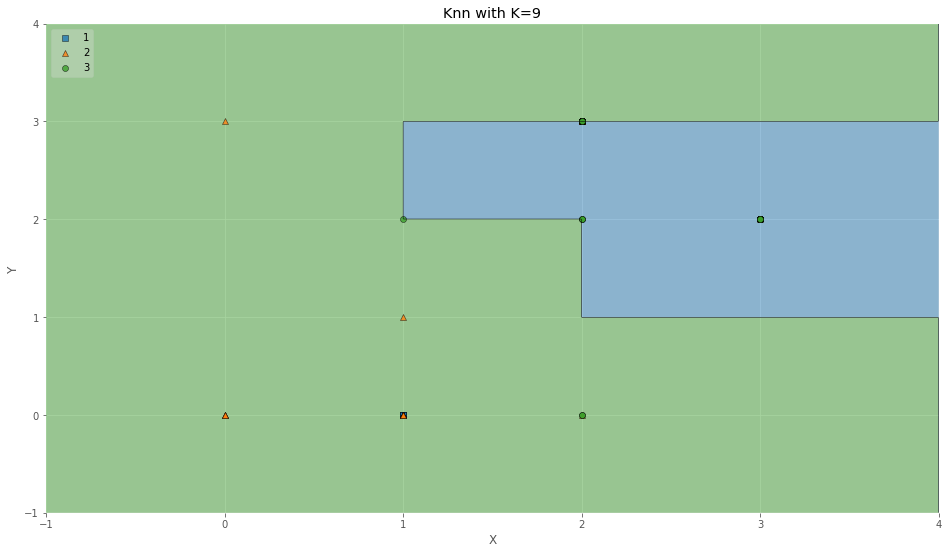

In [26]:
def knn_comparison(data, k):
    x = data[['horas_asincronas','valoracion_clases']].values
    y = data['ind_nivel_am'].values

    clf = neighbors.KNeighborsClassifier(n_neighbors=k)

    clf.fit(x, y)
    # Plotting decision region
    plot_decision_regions(x, y, clf=clf, legend=2)
    # Adding axes annotations
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Knn with K=9')
    plt.show()
    

knn_comparison(dataframe, 9)

<p style="color:red;font-size:2rem"> <b>Para el caso de Aptitud matemática </b></p>

In [27]:
X = dataframe[['id','seccion','edad','pf_ac1','pf_ac2','pf_ac3','pf_apm_2019','pf_apm_2020','am_1b_2021','am_2b_2021',
               'am_3b_2021','am_4b_2021','grupo_mate','genero',
               'anios_colegio','condicion_pago','pe2','pe4','pe5','horas_asincronas','valoracion_clases',
               'dispos_clases','calidad_internet']].values
y = dataframe['ind_nivel_am'].values
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
n_neighbors = 9
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.92
Accuracy of K-NN classifier on test set: 0.91


In [29]:
df = dataframe[['id','seccion','edad','pf_ac1','pf_ac2','pf_ac3','pf_apm_2019','pf_apm_2020','am_1b_2021','am_2b_2021',
               'am_3b_2021','am_4b_2021','grupo_mate','genero',
               'anios_colegio','condicion_pago','pe2','pe4','pe5','horas_asincronas','valoracion_clases',
               'dispos_clases','calidad_internet']]

df

,id,seccion,edad,pf_ac1,pf_ac2,pf_ac3,pf_apm_2019,pf_apm_2020,am_1b_2021,am_2b_2021,...,genero,anios_colegio,condicion_pago,pe2,pe4,pe5,horas_asincronas,valoracion_clases,dispos_clases,calidad_internet
0,1,0,15,13,19,14,13,12,12,13,...,2,3,1,2,0,0,2,3,1,0
1,2,0,14,16,19,17,17,16,15,16,...,1,3,1,0,0,1,3,2,4,3
2,3,0,14,11,18,11,11,11,7,8,...,2,3,1,2,2,2,0,0,1,2
3,4,0,14,17,17,19,16,18,15,16,...,1,3,1,1,0,1,3,2,2,3
4,5,0,15,8,9,11,11,11,9,10,...,2,3,1,2,2,2,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,260,9,14,18,20,20,20,17,16,15,...,1,3,0,1,1,1,3,2,4,3
260,261,9,14,17,20,20,18,17,16,19,...,1,4,0,1,1,1,3,2,2,3
261,262,9,14,16,20,20,17,17,17,19,...,2,4,0,1,0,1,3,2,3,3
262,263,9,14,17,20,20,18,18,18,18,...,2,3,0,1,1,1,2,2,1,3


#### Precisión del modelo

In [30]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 0  3  0]
 [ 0 35  2]
 [ 0  1 25]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.90      0.95      0.92        37
           3       0.93      0.96      0.94        26

    accuracy                           0.91        66
   macro avg       0.61      0.64      0.62        66
weighted avg       0.87      0.91      0.89        66



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
correlation_matrix = dataframe[['id','seccion','edad','pf_ac1','pf_ac2','pf_ac3','pf_apm_2019','pf_apm_2020','am_1b_2021','am_2b_2021',
               'am_3b_2021','am_4b_2021','grupo_mate','genero',
               'anios_colegio','condicion_pago','pe2','pe4','pe5','horas_asincronas','valoracion_clases',
               'dispos_clases','calidad_internet','ind_nivel_am']].corr()
correlation_matrix["ind_nivel_am"]

id                   0.157649
seccion              0.197966
edad                -0.132634
pf_ac1               0.727093
pf_ac2               0.711851
pf_ac3               0.475641
pf_apm_2019          0.781556
pf_apm_2020          0.758673
am_1b_2021           0.727900
am_2b_2021           0.734943
am_3b_2021           0.800446
am_4b_2021           0.799721
grupo_mate           0.359770
genero              -0.122141
anios_colegio        0.151992
condicion_pago      -0.359770
pe2                 -0.592370
pe4                 -0.322369
pe5                 -0.053019
horas_asincronas     0.650225
valoracion_clases    0.160212
dispos_clases       -0.050803
calidad_internet     0.381825
ind_nivel_am         1.000000
Name: ind_nivel_am, dtype: float64

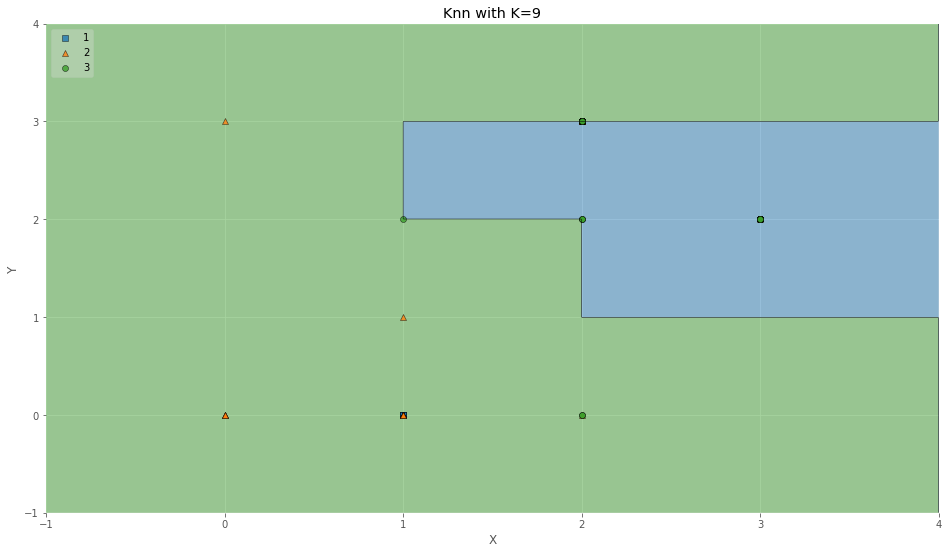

In [32]:
def knn_comparison(data, k):
    x = data[['horas_asincronas','valoracion_clases']].values
    y = data['ind_nivel_am'].values

    clf = neighbors.KNeighborsClassifier(n_neighbors=k)

    clf.fit(x, y)
    # Plotting decision region
    plot_decision_regions(x, y, clf=clf, legend=2)
    # Adding axes annotations
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Knn with K=9')
    plt.show()
    

knn_comparison(dataframe, 9)

<p style="color:red;font-size:2rem"> <b>Para el caso de Geometría</b></p>

In [33]:
X = dataframe[['id','seccion','edad','pf_ac1','pf_ac2','pf_ac3','pf_geo_2019','pf_geo_2020','geo_1b_2021','geo_2b_2021',
               'geo_3b_2021','geo_4b_2021','grupo_mate','genero',
               'anios_colegio','condicion_pago','pe1','pe5','horas_asincronas','valoracion_clases',
               'dispos_clases','calidad_internet']].values
y = dataframe['ind_nivel_geo'].values
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
n_neighbors = 2
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.94
Accuracy of K-NN classifier on test set: 0.92


In [35]:
df = dataframe[['id','seccion','edad','pf_ac1','pf_ac2','pf_ac3','pf_geo_2019','pf_geo_2020','geo_1b_2021','geo_2b_2021',
               'geo_3b_2021','geo_4b_2021','grupo_mate','genero',
               'anios_colegio','condicion_pago','pe1','pe5','horas_asincronas','valoracion_clases',
               'dispos_clases','calidad_internet']]

df

,id,seccion,edad,pf_ac1,pf_ac2,pf_ac3,pf_geo_2019,pf_geo_2020,geo_1b_2021,geo_2b_2021,...,grupo_mate,genero,anios_colegio,condicion_pago,pe1,pe5,horas_asincronas,valoracion_clases,dispos_clases,calidad_internet
0,1,0,15,13,19,14,13,13,15,13,...,0,2,3,1,0,0,2,3,1,0
1,2,0,14,16,19,17,16,16,16,14,...,0,1,3,1,0,1,3,2,4,3
2,3,0,14,11,18,11,11,13,14,6,...,0,2,3,1,2,2,0,0,1,2
3,4,0,14,17,17,19,15,14,14,14,...,0,1,3,1,0,1,3,2,2,3
4,5,0,15,8,9,11,14,11,15,8,...,0,2,3,1,2,2,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,260,9,14,18,20,20,17,17,15,18,...,1,1,3,0,1,1,3,2,4,3
260,261,9,14,17,20,20,18,20,16,18,...,1,1,4,0,1,1,3,2,2,3
261,262,9,14,16,20,20,14,16,15,17,...,1,2,4,0,0,1,3,2,3,3
262,263,9,14,17,20,20,18,18,17,18,...,1,2,3,0,1,1,2,2,1,3


#### Precisión del modelo

In [36]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[33  2]
 [ 3 28]]
              precision    recall  f1-score   support

           2       0.92      0.94      0.93        35
           3       0.93      0.90      0.92        31

    accuracy                           0.92        66
   macro avg       0.93      0.92      0.92        66
weighted avg       0.92      0.92      0.92        66



In [37]:
correlation_matrix = dataframe[['id','seccion','edad','pf_ac1','pf_ac2','pf_ac3','pf_geo_2019','pf_geo_2020','geo_1b_2021','geo_2b_2021',
               'geo_3b_2021','geo_4b_2021','grupo_mate','genero',
               'anios_colegio','condicion_pago','pe1','pe5','horas_asincronas','valoracion_clases',
               'dispos_clases','calidad_internet','ind_nivel_geo']].corr()
correlation_matrix["ind_nivel_geo"]

id                   0.037219
seccion              0.063240
edad                -0.150468
pf_ac1               0.699120
pf_ac2               0.620756
pf_ac3               0.556878
pf_geo_2019          0.706105
pf_geo_2020          0.728069
geo_1b_2021          0.607483
geo_2b_2021          0.651500
geo_3b_2021          0.654882
geo_4b_2021          0.683675
grupo_mate           0.272508
genero              -0.175860
anios_colegio        0.139536
condicion_pago      -0.272508
pe1                 -0.411735
pe5                 -0.105773
horas_asincronas     0.582923
valoracion_clases    0.199062
dispos_clases       -0.054257
calidad_internet     0.282397
ind_nivel_geo        1.000000
Name: ind_nivel_geo, dtype: float64

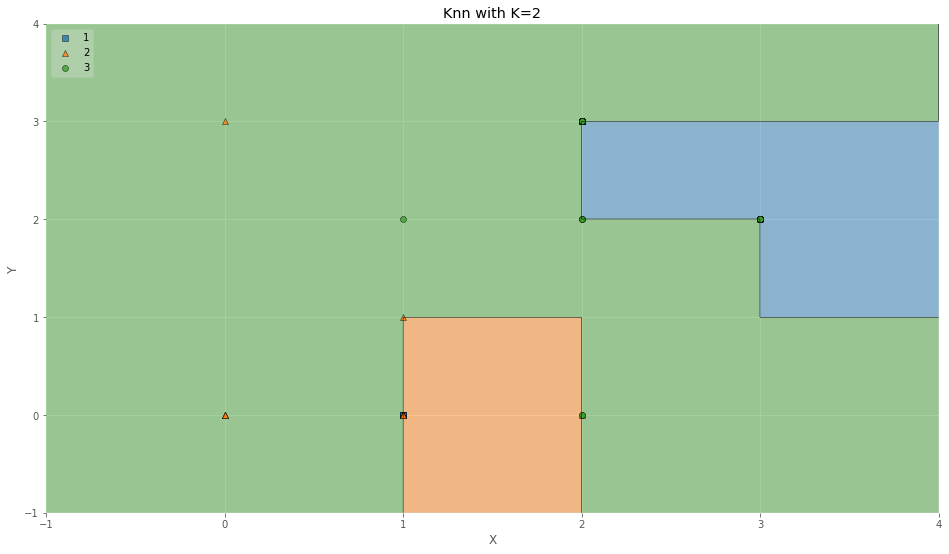

In [38]:
def knn_comparison(data, k):
    x = data[['horas_asincronas','valoracion_clases']].values
    y = data['ind_nivel_am'].values

    clf = neighbors.KNeighborsClassifier(n_neighbors=k)

    clf.fit(x, y)
    # Plotting decision region
    plot_decision_regions(x, y, clf=clf, legend=2)
    # Adding axes annotations
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Knn with K=2')
    plt.show()
    

knn_comparison(dataframe, 2)